In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import subprocess
from glob import glob
from pkg import *

In [2]:
# dataset_num = input("Enter dataset number: ")
# dataset = dataset_num.zfill(2) # string (ex '01')
dataset = '01'

myPaths = pm.PathManager(dataset=dataset)
myProcessor = p.Processor(paths=myPaths, dataset=dataset)
clen, photon_energy = myProcessor.get_parameters()
print(f"clen: {clen}, photon_energy: {photon_energy}")

f.get_counts(paths=myPaths)

clen: 1.5, photon_energy: 6000
Paths refreshed for dataset 01.
Directory: peaks/01
	Total files: 39
	Normal images: 39
	Empty images: 0
Directory: labels/01
	Total files: 39
	Normal images: 39
	Empty images: 0
Directory: peaks_water_overlay/01
	Total files: 39
	Normal images: 39
	Empty images: 0


In [3]:
# f.get_counts(paths=myPaths)

# %run process_directory.py ../../images  --percent_empty 0.5 

f.get_counts(paths=myPaths)


Paths refreshed for dataset 01.
Directory: peaks/01
	Total files: 39
	Normal images: 39
	Empty images: 0
Directory: labels/01
	Total files: 39
	Normal images: 39
	Empty images: 0
Directory: peaks_water_overlay/01
	Total files: 39
	Normal images: 39
	Empty images: 0
Directories '01' through '09' already created in '../../images/labels'.
Directories '01' through '09' already created in '../../images/peaks'.
Directories '01' through '09' already created in '../../images/peaks_water_overlay'.
Directories '01' through '09' already created in '../../images/water'.
Directories for dataset 01 have been processed. Matching file counts found.
Directories for dataset 02 have been processed. Matching file counts found.
Directories for dataset 03 have been processed. Matching file counts found.
Directories for dataset 04 have been processed. Matching file counts found.
Directories for dataset 05 have been processed. Matching file counts found.
Directories for dataset 06 have been processed. Matchin

In [4]:
myDataManager = dm.DatasetManager(paths=myPaths, dataset=dataset, parameters=[clen,photon_energy], transform=None)

# peak, label, overlay are valid types
clen, photon_energy = myProcessor.get_parameters()

f.check_attributes(paths=myPaths, dataset=dataset, type='peak', clen=clen, photon_energy=photon_energy) 
f.check_attributes(paths=myPaths, dataset=dataset, type='overlay', clen=clen, photon_energy=photon_energy)
f.check_attributes(paths=myPaths, dataset=dataset, type='label', clen=clen, photon_energy=photon_energy)

train_loader, test_loader = f.prepare(data_manager=myDataManager, batch_size=10)

Paths refreshed for dataset 01.
Directory: peaks/01
	Total files: 58
	Normal images: 39
	Empty images: 19
Directory: labels/01
	Total files: 97
	Normal images: 78
	Empty images: 19
Directory: peaks_water_overlay/01
	Total files: 97
	Normal images: 78
	Empty images: 19
Paths refreshed for dataset 01.
Actual percentage of empty images: 26.76056338028169% across peaks, water_overlays, and labels directories.



All files in dataset 01 of type 'peak' have matching attributes.
All files in dataset 01 of type 'label' have matching attributes.
All files in dataset 01 of type 'overlay' have matching attributes.
All files in dataset 01 of type 'background' have matching attributes.
Dataset 01 authenticated.

Final dataset sizes - Peaks: 58, Labels: 58, Overlays: 97
All files in dataset 01 of type 'peak' have matching attributes.
All files in dataset 01 of type 'overlay' have matching attributes.
All files in dataset 01 of type 'label' have matching attributes.

Data prepared.
Train size: 46
Test size: 12
Batch size: 10
Number of batches in train_loader: 5 



In [5]:
f.check_attributes(paths=myPaths, dataset=dataset, type='peak', clen=clen, photon_energy=photon_energy)
test_path = myPaths.get_peak_image_paths(dataset)[0]
test = f.retrieve_attributes(test_path) 
print(test)

All files in dataset 01 of type 'peak' have matching attributes.
{'clen': 1.5, 'peak': True, 'photon_energy': 6000}


In [6]:
dir(m)

['BasicCNN1',
 'BasicCNN2',
 'BasicCNN3',
 'DenseNet121_Weights',
 'DenseNetBraggPeakClassifier',
 'F',
 'Photon_Scattering_CNN1',
 'ResNet50BraggPeakClassifier',
 'ResNet50_Weights',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'models',
 'nn',
 'np',
 'optim',
 'os',
 'torch']

In [7]:
model1 = m.BasicCNN3()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(device)
device = torch.device("cpu")

feature = 'peak'

cfg = {
    'num_epochs': 2,
    'num_classes': 2,
    'batch_size': train_loader.batch_size,
    'test_size': len(train_loader.dataset),
    'test_size': len(test_loader.dataset),
    'criterion': criterion,
    'optimizer': optimizer,
    'device': device,
    'model': model1,
    }

# # arguments: self, model, loader: list, criterion, optimizer, device, cfg: dict
t = train_eval.TrainTestModels(model=model1, loader=[train_loader, test_loader], criterion=criterion, optimizer=optimizer, device=device, cfg=cfg, feature=feature)

TypeError: TrainTestModels.__init__() missing 1 required positional argument: 'feature'

Model testing and validating: BasicCNN3
-- epoch 0


Train loss: 32.98891428485513
Train accuracy: 0.6521739363670349
Test loss: 5.576297691324726
Test accuracy: 1.0
-- epoch 1
Train loss: 15.066986114470637
Train accuracy: 0.8260869383811951
Test loss: 1.0166788760625423
Test accuracy: 1.0


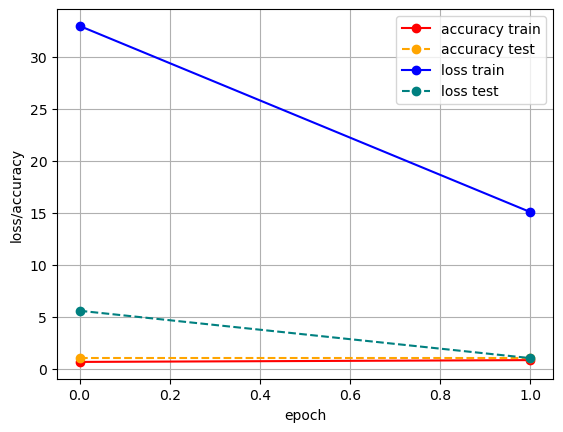

In [ ]:
t.epoch_loop()
t.plot_loss_accuracy()

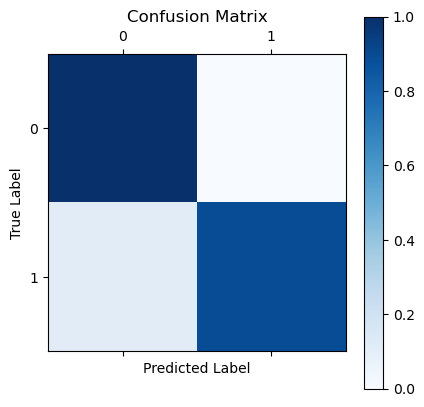

array([[1.        , 0.        ],
       [0.11111111, 0.88888889]])

In [ ]:
t.plot_confusion_matrix()
t.get_confusion_matrix()

In [ ]:
test_peaks = myPaths.get_peak_image_paths(dataset=dataset)[0]
test_water = myPaths.get_peaks_water_overlay_image_paths(dataset=dataset)[0]
test_overlay = myPaths.get_peaks_water_overlay_image_paths(dataset=dataset)[0]
param1, param2 = (0.5, 9000), (0.5, 9000, True)
f.assign_attributes(file_path=test_peaks, params=param1)

Attributes ['params'] assigned to c:\Users\eseveret\Desktop\cxls_hitfinder\images\peaks\01\empty_peak_01_00001.h5


In [ ]:
t.save_model('../models/cnn3_test.pt')

In [ ]:
test_model = m.BasicCNN3()
test_model.load_state_dict(torch.load('../models/cnn3_test.pt'))
test_model.eval()


BasicCNN3(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc): Linear(in_features=67584, out_features=1, bias=True)
)

In [ ]:
for data, label, attribute in train_loader:
    peak, _ = data
    peak_image_attribute = attribute['peak']
    output = test_model(peak)
    print(peak_image_attribute)
    print(torch.sigmoid(output).reshape(1,-1) > 0.5)
    print('-------------------')

tensor([False])
tensor([[False]])
-------------------
tensor([True])
tensor([[True]])
-------------------
tensor([True])
tensor([[True]])
-------------------
tensor([False])
tensor([[False]])
-------------------
tensor([False])
tensor([[False]])
-------------------
tensor([True])
tensor([[True]])
-------------------
tensor([True])
tensor([[True]])
-------------------
tensor([True])
tensor([[True]])
-------------------
tensor([True])
tensor([[True]])
-------------------
tensor([True])
tensor([[True]])
-------------------
tensor([True])
tensor([[True]])
-------------------
tensor([True])
tensor([[True]])
-------------------
tensor([True])
tensor([[True]])
-------------------
tensor([False])
tensor([[False]])
-------------------
tensor([True])
tensor([[True]])
-------------------
tensor([True])
tensor([[True]])
-------------------
tensor([False])
tensor([[False]])
-------------------
tensor([True])
tensor([[True]])
-------------------
tensor([True])
tensor([[True]])
-------------------
te